In [3]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick_ohlc
from matplotlib.axes import Axes
from matplotlib.dates import date2num

In [4]:
def latest_weekday():
    date_traded = datetime.date.today()
    weekdays = (0, 1, 2, 3, 4)
    while date_traded.weekday() not in weekdays:
        date_traded -= datetime.timedelta(days=1)
    return datetime.datetime(date_traded.year, date_traded.month,
                             date_traded.day, 9, 30)

In [5]:
def convert_dates(date_list, interval):
    start_datetime = float(date_list[0][1:])
    start_datetime = datetime.datetime.fromtimestamp(start_datetime)
    add_interval = datetime.timedelta(seconds=interval)
    for i in range(len(date_list)):
        date_list[i] = start_datetime + add_interval*i
    return date_list

In [8]:
def grab_data(ticker):
    ticker = ticker.upper()
    base_url = 'https://www.google.com/finance/getprices?q={}'.format(ticker)
    date_of_interest = datetime.datetime.timestamp(latest_weekday())
    interval = 60
    period = 1
    period_unit = 'd'
    params = '&ts={}&i={}&p={}{}&f=d,o,h,l,c,v'.format(date_of_interest,
                                                       interval,
                                                       period,
                                                       period_unit)
    url = base_url+params
    headers = 'date, open, high, low, close, volume'.split(', ')
    data = pd.read_csv(url, skiprows=7, names=headers)
    dates = convert_dates(data['date'].tolist(), 60)
    #dates = [d.strftime('%H:%M') for d in dates]
    dates = pd.Series(dates)
    data['date'] = dates
    return data

In [13]:
def plot_data(data):
    %matplotlib inline
    candlestick_ohlc(
                     plt.gca(),
                     list(zip(
                      date2num(data.date.dt.to_pydatetime().tolist()),
                      data.open.tolist(),
                      data.high.tolist(),
                      data.low.tolist(),
                      data.close.tolist(),
                      data.volume.tolist(),
                      )),
                     width=0.00068,
                     colorup='g',
                     colordown='r',
                     )
    plt.show()

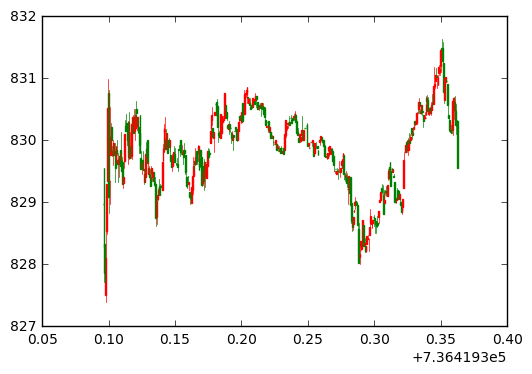

In [14]:
data = grab_data('goog')
plot_data(data)